In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import os


In [3]:
def newDataReader(datapath):
    
    with open(datapath, 'r') as file:
        lines = file.readlines()

    data_blocks = []  # to store individual data blocks of 1000 lines each

    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if '----' in line:
            i += 1
            continue
        else:
            start = i
            # Find the end of this block (either another dash line or end of file)
            while i < len(lines) and '----' not in lines[i]:
                i += 1
            end = i
            
            block = lines[start:end]
            data = [list(map(float, item.split(','))) for item in block if ',' in item]  # convert string to list of floats
            
            # Check the length of data, adjust and log if necessary
            if len(data) < 1000:
                padding = [[0.0] * 9 for _ in range(1000 - len(data))]
                data.extend(padding)
                print(f"Data block starting at line {start} has less than 1000 lines. Padding with zeros.")
            elif len(data) > 1000:
                data = data[:1000]
                print(f"Data block starting at line {start} has more than 1000 lines. Truncating to 1000.")
            
            data_blocks.append(data)

    # Convert list of data blocks into a 3D numpy array
    datasets_array = np.array(data_blocks)
    
    return datasets_array


folder = "c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/"

dataset1_label = ["Healthy2", "Healthy3", "Loose2", "Loose3", "Cavitation", "Cavitation2", "Cavitation3", "Cavitation10"]

all_data = []
all_labels = []

for label in dataset1_label:
    num_files = 0
    files = glob.glob(folder + label + "/*")
    Dataset = []
    for file in files:
        if num_files == 20:
            break
        num_files += 1
        print(file)
        data_segment = newDataReader(file)
        Dataset.append(data_segment)
    Dataset_np = np.concatenate(Dataset, axis=0)  # shape becomes (9, total_n_for_this_label, 1000)
    Dataset_np = np.transpose(Dataset_np, (0, 2, 1))  # shape becomes (total_n_for_this_label, 9, 1000)

    # Append to main data list
    all_data.append(Dataset_np)
    
    # Create and append labels for this data
    labels_for_this_data = [label] * Dataset_np.shape[0]  # repeat the label 'total_n_for_this_label' times
    all_labels.extend(labels_for_this_data)

# remove last 3 columns
all_data = [data[:, :6, :] for data in all_data]

# Combine all data segments
all_data_np = np.concatenate(all_data, axis=0)  # shape: (total_n, 9, 1000)

# Convert all labels to numpy array for consistency
all_labels_np = np.array(all_labels)


c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T16-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T17-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T18-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T19-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T20-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T21-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T22-00-01.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-12T23-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-13T00-00-00.txt
c:/Users/jared/Desktop/EG3301R_Repos/collected_data/datacollect/Healthy2\2023-09-13T01-00-00.txt
c:/Users/jared/Desktop/EG3301R

In [4]:


print(all_data_np.shape)  # This should give (total_n, 9, 1000)
print(all_labels_np.shape)  # This should give (total_n,)



(44065, 6, 1000)
(44065,)


In [5]:
# to convert to 100 sized segments

new_data = []
new_data_last3 = [] # store several instaces of idx (1 - 0, 2)

for sample in all_data_np:
    for i in range(0, 1000, 100):
        new_data.append(sample[:, i:i+26])
        

# Convert new_data list to numpy array
all_data_np_reshaped = np.array(new_data)

# Adjust labels
all_labels_np_reshaped = np.repeat(all_labels_np, 10)


# erase new_data
del new_data

# add live data to the end of the dataset

# all_data_np_reshaped = np.concatenate((all_data_np_reshaped, dataset_live), axis=0)
# all_labels_np_reshaped = np.concatenate((all_labels_np_reshaped, dataset_live_labels), axis=0)

print(all_data_np_reshaped.shape)
print(all_labels_np_reshaped.shape)



(440650, 6, 26)
(440650,)


In [6]:

# normalize the data for each axis for the first 6 axes from -1 to 1
# the last 3 axes are already in the range of 0 to 1
# use MinMaxScaler from sklearnW
data_to_use = all_data_np_reshaped
labels_to_use = all_labels_np_reshaped

# clear reshaped data
del all_data_np_reshaped
del all_labels_np_reshaped


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
for i in range(6):
    data_to_use[:, i, :] = scaler.fit_transform(data_to_use[:, i, :])
    

In [7]:
# choose one axis so that we can do ml on it
import seaborn as sns

# all_data_oneaxis = all_data_np[:, 0, :]  # shape: (total_n, 1000)

# create new dataframe that consists of the combination of the first 100 data points of each segment for the first 6 segments resulting in (total_n, 600)

# normal
# all_data_concat = np.concatenate((data_to_use[:, 0,:100], data_to_use[:, 1, :100], data_to_use[:, 2, :100], data_to_use[:, 3, :100], data_to_use[:, 4, :100], data_to_use[:, 5, :100]), axis=1)
# all_data_concat = np.concatenate((data_to_use[:, 0,:20], data_to_use[:, 1, :20], data_to_use[:, 2, :20], data_to_use[:, 3, :20], data_to_use[:, 4, :20], data_to_use[:, 5, :20]), axis=1)

# 2d prep
# all_data_concat = np.concatenate((data_to_use[:, 0,:96], data_to_use[:, 1, :96], data_to_use[:, 2, :96], data_to_use[:, 3, :96], data_to_use[:, 4, :96], data_to_use[:, 5, :96]), axis=1)

all_data_concat = data_to_use

print(all_data_concat.shape)
print(labels_to_use.shape)


(440650, 6, 26)
(440650,)


In [8]:
# convert into 2d array (24,24,1)

# X = all_data_concat.reshape(all_data_concat.shape[0], 24, 24, 1)

X = all_data_concat
X = np.transpose(X, (0, 2, 1))

print(X.shape)


(440650, 26, 6)


In [8]:
# make them 2d for 2d cnn

X = all_data_concat.reshape(all_data_concat.shape[0], 10, 10, 6)
print(X.shape)

(1344620, 10, 10, 6)


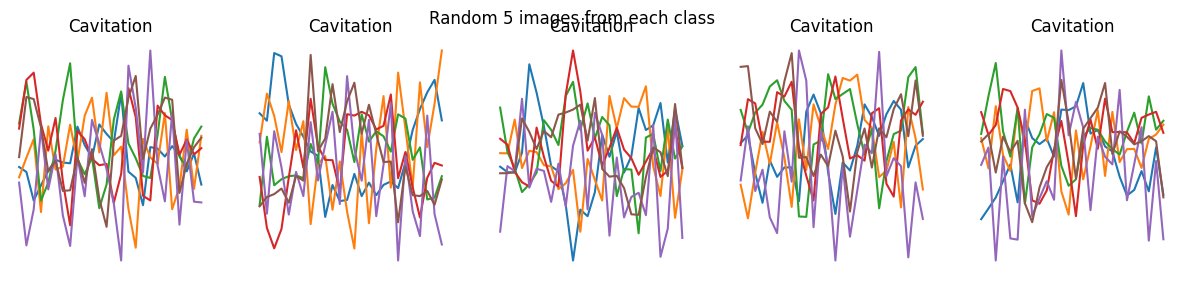

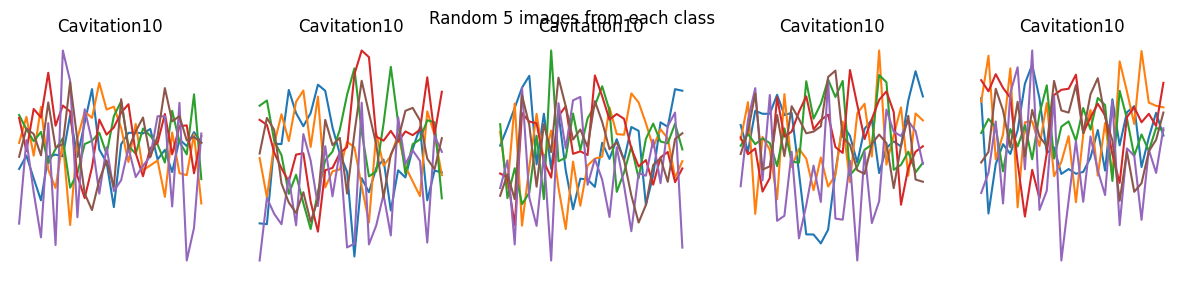

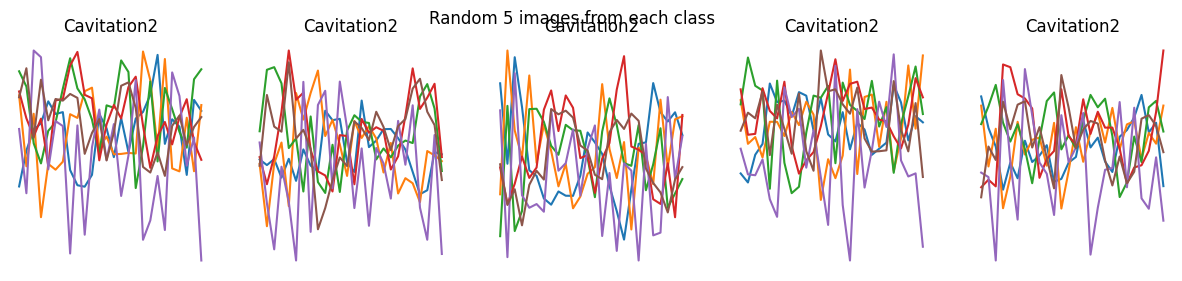

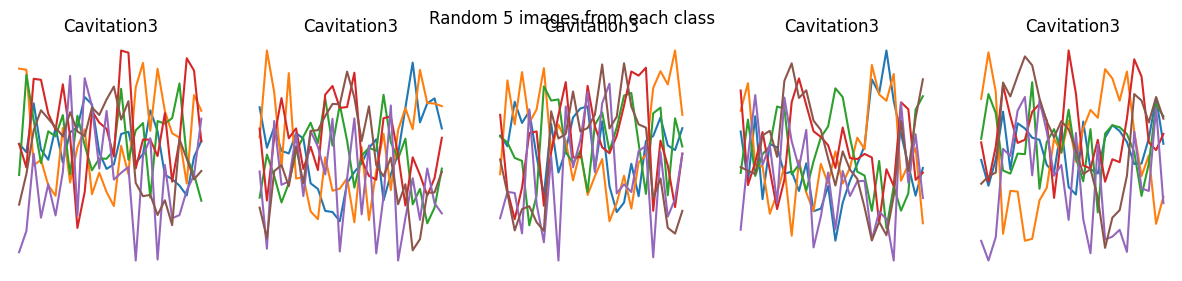

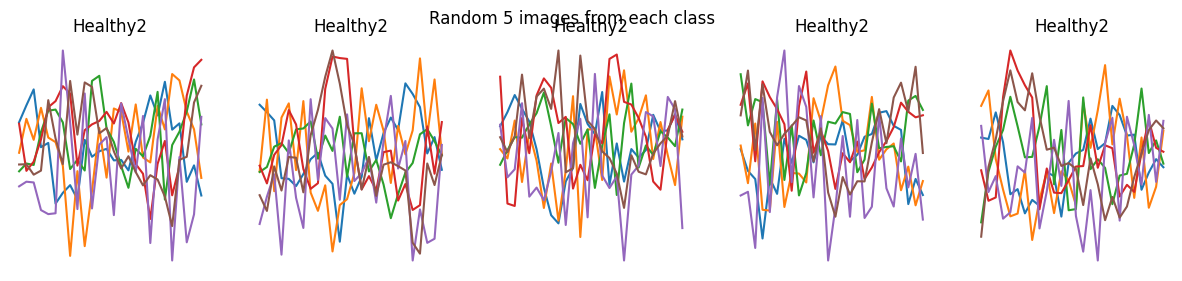

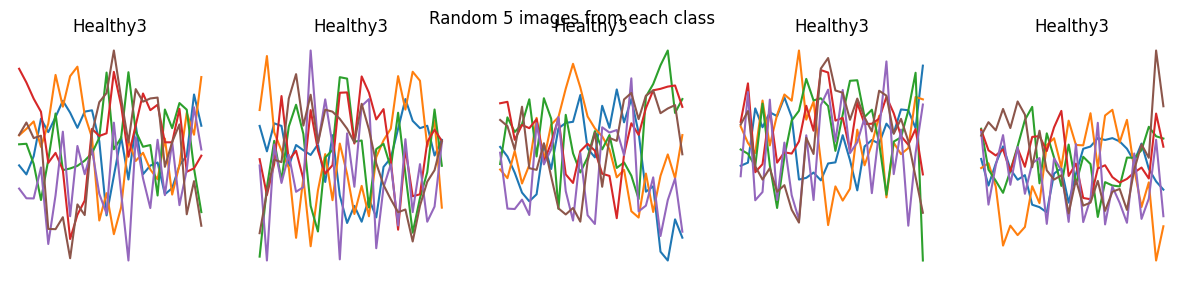

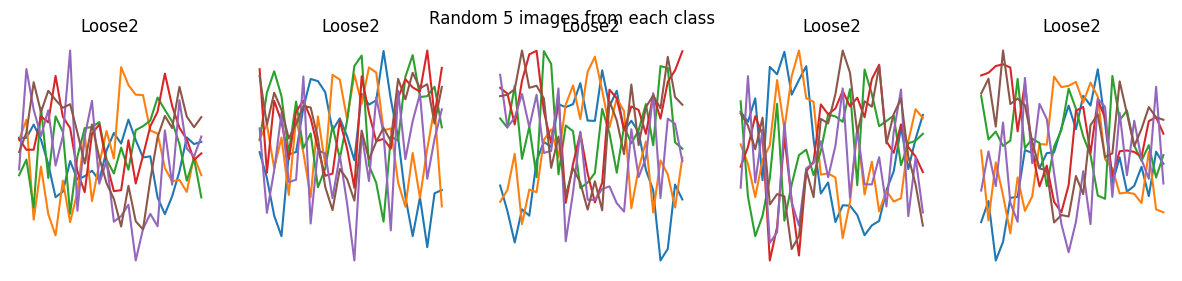

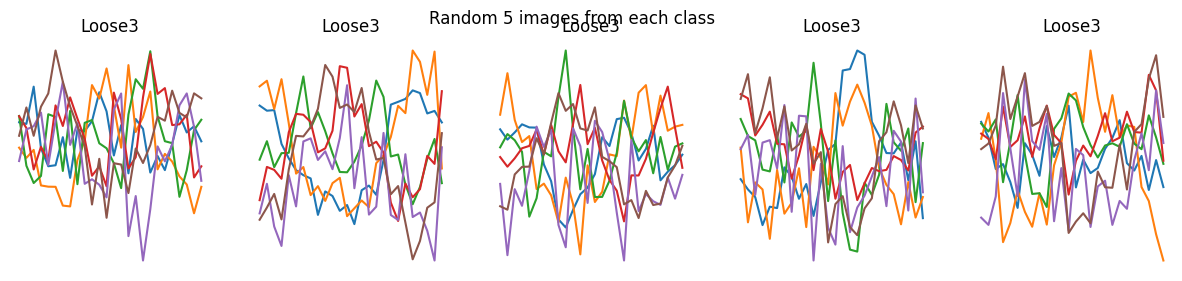

In [9]:
# visualize random 5 images from each class

indices = []
unique_labels = np.unique(labels_to_use)

for label in unique_labels:
    # get 5 random indices of images with `label`
    label_indices = np.random.choice(np.where(labels_to_use == label)[0], 5, replace=False)
    
    # add the indices to the list of all indices
    indices.append(label_indices)

for type in indices:
    # set plot size to 5 columns
    plt.figure(figsize=(15, 3))
    plt.suptitle('Random 5 images from each class')
    for index in type:
        # plot image in increasing column number
        plt.subplot(1, 5, list(type).index(index)+1)
        plt.plot(X[index])
        plt.axis('off')
        plt.title(labels_to_use[index]) 
    plt.show()
        



In [10]:
from sklearn.model_selection import train_test_split

# Healthy total will be combined Healthy2, Healthy3, (n, 100, 6)
Healthy_total = X[np.where(labels_to_use == "Healthy2")]
Healthy_total = np.concatenate((Healthy_total, X[np.where(labels_to_use == "Healthy3")]), axis=0)

# # Healthy train be first 50% of Healthy2 + first 50% of Healthy3, (n / 2, 100, 6)
Healthy_train, Healthy_hidden = train_test_split(Healthy_total, test_size=0.5, random_state=42)


Loose2 = X[np.where(labels_to_use == "Loose2")]
Loose3 = X[np.where(labels_to_use == "Loose3")]

Cavitation = X[np.where(labels_to_use == "Cavitation")]
Cavitation2 = X[np.where(labels_to_use == "Cavitation2")]
Cavitation3 = X[np.where(labels_to_use == "Cavitation3")]


print(Healthy_total.shape)
print(Healthy_train.shape)


(110180, 26, 6)
(55090, 26, 6)


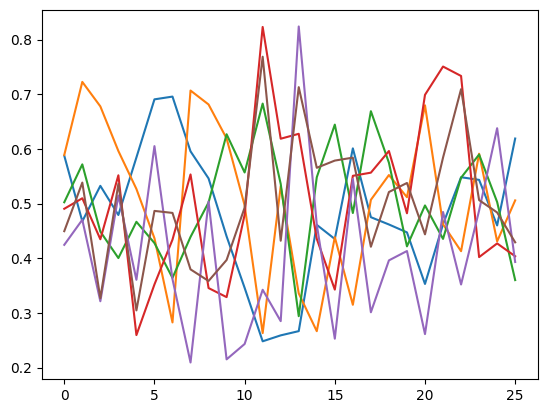

(55640, 26, 6)
(55640, 26, 6)


In [11]:
import numpy as np

def augment_data_with_noise(healthy_data, noise_fraction=0.1, noise_scale=0.05):
    """
    Introduce noise to a fraction of healthy data.

    Parameters:
    - healthy_data: The original healthy data
    - noise_fraction: Fraction of data to which noise should be added
    - noise_scale: Scale of the Gaussian noise

    Returns:
    - augmented_data: Original data + noisy data
    - targets: Target values (original data -> original data, noisy data -> all 1s)
    """
    # Calculate number of samples to which noise will be added
    num_noisy_samples = int(noise_fraction * len(healthy_data))

    # Randomly select samples
    noisy_indices = np.random.choice(len(healthy_data), size=num_noisy_samples, replace=False)
    noisy_samples = healthy_data[noisy_indices]

    # Add Gaussian noise and clip values to ensure they remain between 0 and 1
    noise = noise_scale * np.random.randn(*noisy_samples.shape)
    noisy_samples = np.clip(noisy_samples + noise, 0, 1)
    
    # plot noisy sample for visualization
    plt.plot(noisy_samples[0])
    plt.show()

    # Combine original and noisy data
    augmented_data = np.vstack([healthy_data, noisy_samples])

    # Create targets: original data -> original data, noisy data -> all 1s
    original_targets = healthy_data
    noisy_targets = np.ones_like(noisy_samples)
    targets = np.vstack([original_targets, noisy_targets])

    return augmented_data, targets

# Usage:
# augmented_train, targets = augment_data_with_noise(Healthy_train)



Healthy_train, Healthy_penalty = augment_data_with_noise(Healthy_train, noise_fraction=0.01, noise_scale=0.05)

print(Healthy_train.shape)
print(Healthy_penalty.shape)



In [12]:
# how much unique data do we have from labels
unique_labels, counts = np.unique(labels_to_use, return_counts=True)
print(unique_labels)
print(counts)

['Cavitation' 'Cavitation10' 'Cavitation2' 'Cavitation3' 'Healthy2'
 'Healthy3' 'Loose2' 'Loose3']
[55070 55080 55080 55080 55090 55090 55070 55090]


(10000, 26, 6)
(10000, 26, 6)


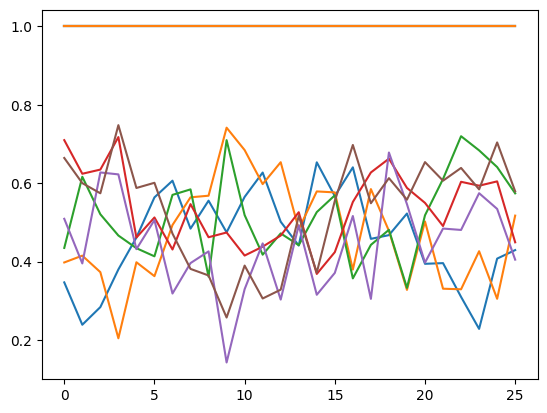

(65640, 26, 6)
(65640, 26, 6)


In [13]:


# take 2000 random samples from each alternate data for penalty

Loose2_penalty = Loose2[np.random.choice(len(Loose2), size=2000, replace=False)]
Loose3_penalty = Loose3[np.random.choice(len(Loose3), size=2000, replace=False)]

Cavitation_penalty = Cavitation[np.random.choice(len(Cavitation), size=2000, replace=False)]
Cavitation2_penalty = Cavitation2[np.random.choice(len(Cavitation2), size=2000, replace=False)]
Cavitation3_penalty = Cavitation3[np.random.choice(len(Cavitation3), size=2000, replace=False)]

# combine all penalty data
penalty_data = np.concatenate((Loose2_penalty, Loose3_penalty, Cavitation_penalty, Cavitation2_penalty, Cavitation3_penalty), axis=0)

# create penalty targets
penalty_targets = np.ones((penalty_data.shape[0], (Healthy_train.shape[1]), (Healthy_train.shape[2])))

print(penalty_data.shape)
print(penalty_targets.shape)

# add to Healthy_train and Healthy_penalty
temp = Healthy_train
Healthy_train = np.concatenate((Healthy_train, penalty_data), axis=0)
Healthy_penalty = np.concatenate((temp, penalty_targets), axis=0)
del temp
# plot the penalty_data vs penalty_targets
plt.plot(penalty_data[0])
plt.plot(penalty_targets[0])
plt.show()

print(Healthy_train.shape)
print(Healthy_penalty.shape)


In [14]:

# Step 2: Split the data
X_train, X_test, Y_train, Y_test = train_test_split(Healthy_train, Healthy_penalty, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(52512, 26, 6)
(13128, 26, 6)
(52512, 26, 6)
(13128, 26, 6)


In [40]:
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf

# turn off gpu
# tf.config.set_visible_devices([], 'GPU')

from keras.models import Model
from keras.layers import Input, Dense, LeakyReLU, Conv1D, MaxPooling1D, UpSampling1D, Conv1DTranspose, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, LSTM, TimeDistributed
from keras.optimizers import Adam, Nadam
from keras.callbacks import EarlyStopping
from keras.losses import mse as mse_loss
from keras import Sequential
from keras.layers import Dropout
from keras.regularizers import l1, l2
from keras import backend as K

# define autoencoder cnn using 6 axis

input_layer = Input(shape=(26, 6))
x = Conv1D(16, 25, activation="elu", padding="same")(input_layer)
x = Dropout(0.2)(x)
x = MaxPooling1D(2, padding="same")(x)
x = Conv1D(8, 15, activation="elu", padding="same")(x)
x = Dropout(0.2)(x)
encoded = Conv1D(4, 10, activation="elu", padding="same")(x)

x = Dropout(0.2)(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(8, 15, activation="elu", padding="same")(x)
x = Dropout(0.2)(x)
x = Conv1D(16, 25, activation="elu", padding="same")(x)
x = Dropout(0.2)(x)
# x = Flatten()(x)
# x = Dense(156)(x)
# decoded = Reshape((26, 6))(x)
decoded = Conv1D(6, 26, activation="sigmoid", padding="same")(x)

autoencoder = Model(input_layer, decoded)


# input_layer = Input(shape=(100, 6))
# x = Conv1D(16, 5, activation="elu", padding="same")(input_layer)
# x = MaxPooling1D(2, padding="same")(x)
# encoded = Conv1D(8, 5, activation="elu", padding="same")(x)

# x = UpSampling1D(2)(encoded)
# decoded = Conv1D(6, 5, activation="sigmoid", padding="same")(x)

# autoencoder = Model(input_layer, decoded)



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode="auto")

autoencoder.summary()

# Step 4: Train the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')



Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 26, 6)]           0         
                                                                 
 conv1d_68 (Conv1D)          (None, 26, 16)            2416      
                                                                 
 dropout_60 (Dropout)        (None, 26, 16)            0         
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 13, 16)            0         
 g1D)                                                            
                                                                 
 conv1d_69 (Conv1D)          (None, 13, 8)             1928      
                                                                 
 dropout_61 (Dropout)        (None, 13, 8)             0         
                                                          

In [41]:
# history = autoencoder.fit(X_train, Y_train, epochs=50, batch_size=3000, validation_data = [X_test, Y_test], callbacks=[early_stopping])

history = autoencoder.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = [X_test, Y_test])

Epoch 1/10
206/206 [==============================] - 9s 36ms/step - loss: 0.0429 - val_loss: 0.0375
Epoch 2/10
206/206 [==============================] - 7s 34ms/step - loss: 0.0378 - val_loss: 0.0360
Epoch 3/10
206/206 [==============================] - 7s 34ms/step - loss: 0.0350 - val_loss: 0.0307
Epoch 4/10
206/206 [==============================] - 7s 34ms/step - loss: 0.0339 - val_loss: 0.0310
Epoch 5/10
206/206 [==============================] - 7s 35ms/step - loss: 0.0322 - val_loss: 0.0359
Epoch 6/10
206/206 [==============================] - 7s 34ms/step - loss: 0.0299 - val_loss: 0.0265
Epoch 7/10
206/206 [==============================] - 8s 38ms/step - loss: 0.0287 - val_loss: 0.0257
Epoch 8/10
206/206 [==============================] - 8s 38ms/step - loss: 0.0277 - val_loss: 0.0244
Epoch 9/10
206/206 [==============================] - 8s 40ms/step - loss: 0.0273 - val_loss: 0.0249
Epoch 10/10
206/206 [==============================] - 8s 37ms/step - loss: 0.0261 - val_lo

2052/2052 [==============================] - 6s 3ms/step
(65640, 26, 6)
(65640,)


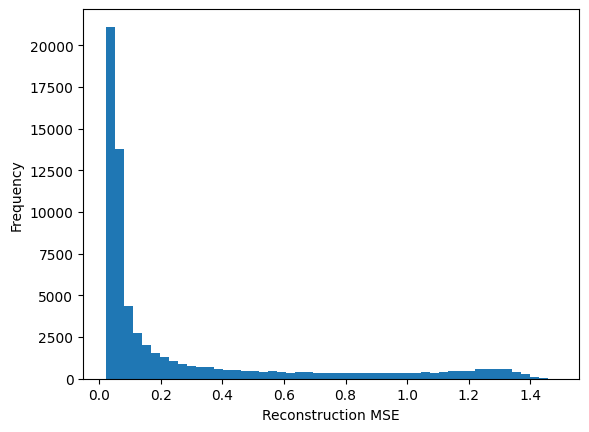

Threshold:  0.9714846918750903


In [42]:

# Step 5: Evaluate the model
reconstructed_data = autoencoder.predict(Healthy_train)
mse = np.mean(np.power(Healthy_train - reconstructed_data, 2), axis=1)
addup_mse = np.sum(mse, axis=1)

print(reconstructed_data.shape)
print(addup_mse.shape)

# plot the mse histogram
plt.hist(addup_mse, bins=50)
plt.xlabel("Reconstruction MSE")
plt.ylabel("Frequency")
plt.show()



# Step 6: Set a threshold
threshold = np.percentile(addup_mse, 90)  # Set the threshold to the 95th percentile of the reconstruction errors
print("Threshold: ", threshold)
# threshold = 0.0125


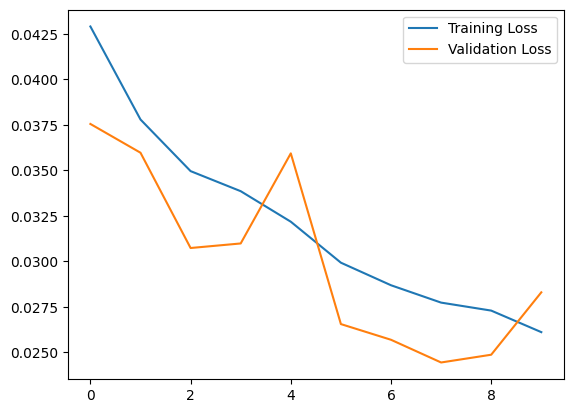

1722/1722 [==============================] - 4s 2ms/step


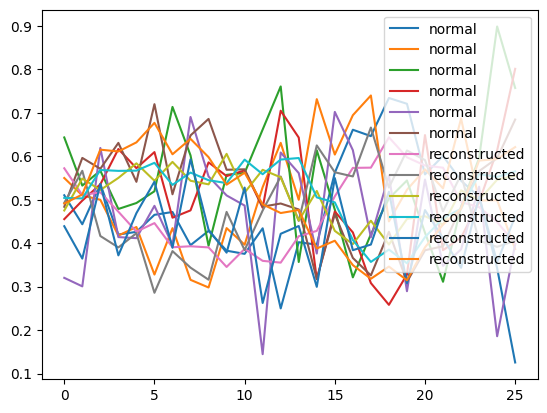

Anomalies in normal data: 1.862406970412053 %


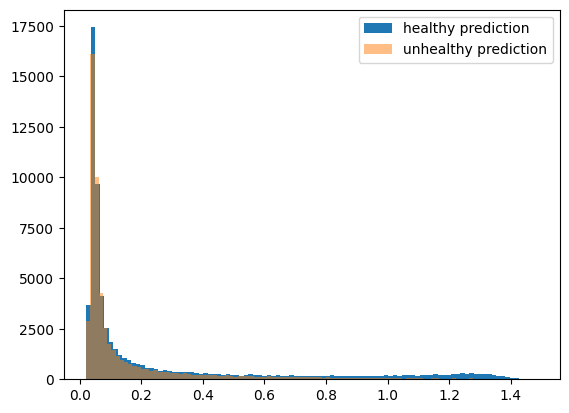

1721/1721 [==============================] - 3s 2ms/step


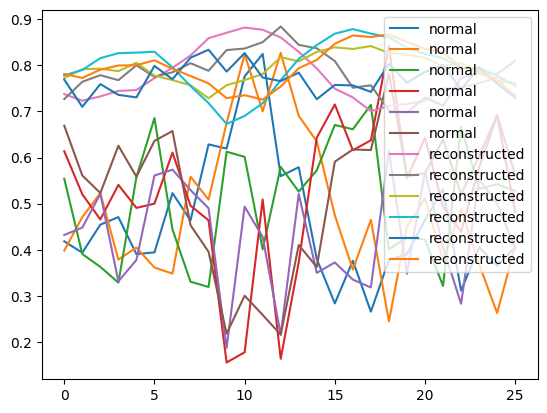

Anomalies in Loose2 data: 87.74650444888324 %


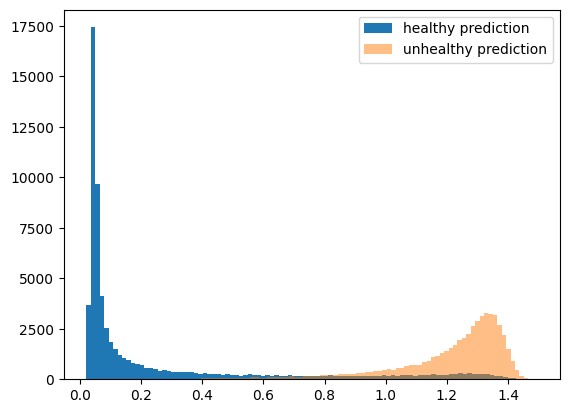

1722/1722 [==============================] - 4s 2ms/step


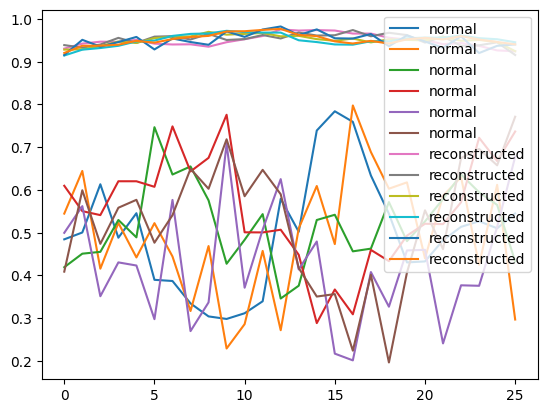

Anomalies in Loose3 data: 65.52550372118353 %


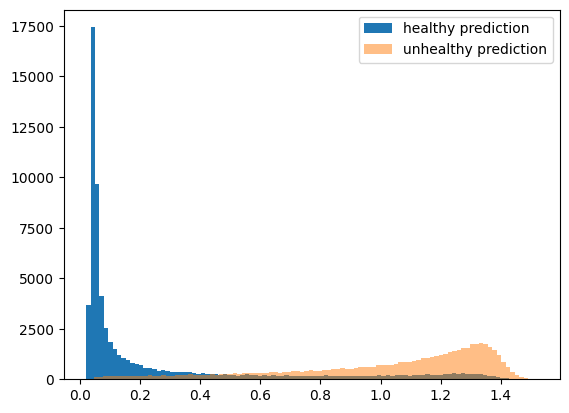

1721/1721 [==============================] - 3s 2ms/step


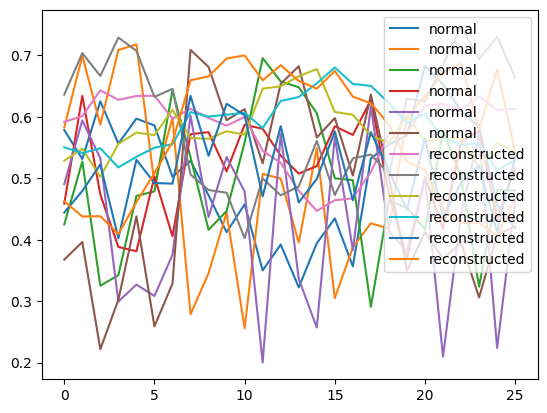

Anomalies in Cavitation data: 6.749591429090248 %


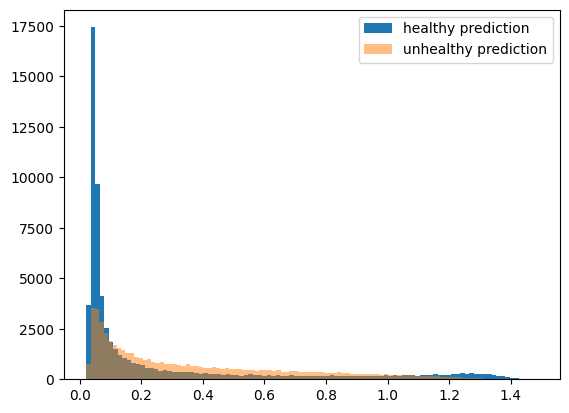

1722/1722 [==============================] - 3s 2ms/step


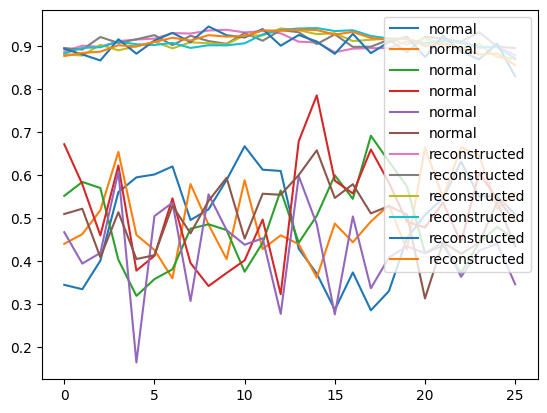

Anomalies in Cavitation2 data: 71.40704429920116 %


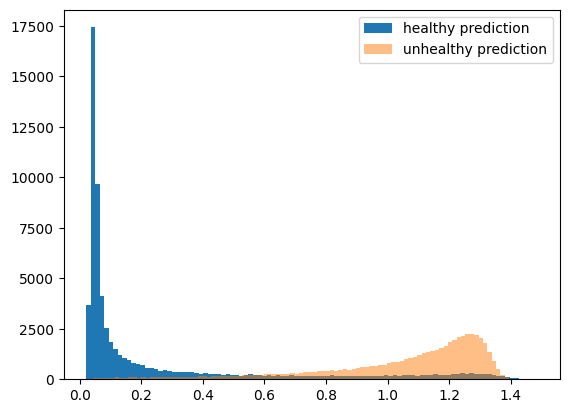

1722/1722 [==============================] - 3s 2ms/step


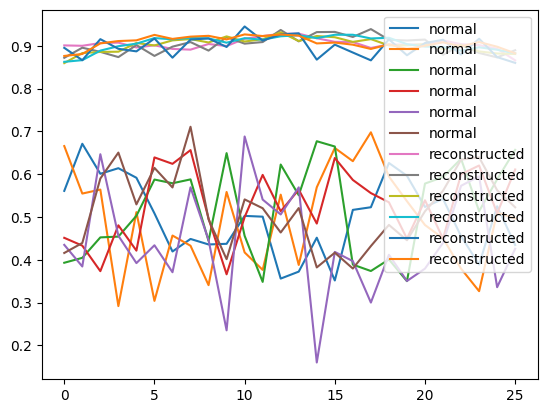

Anomalies in Cavitation3 data: 39.248366013071895 %


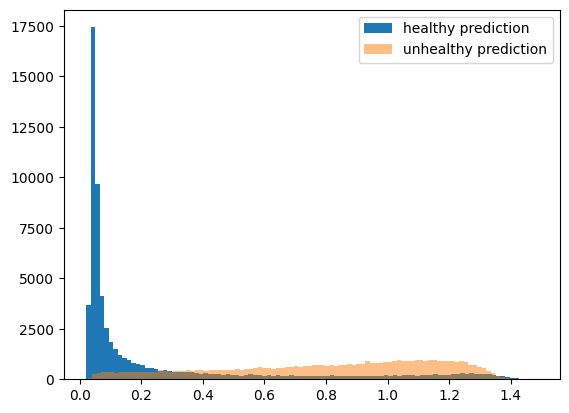

In [43]:


# Step 7: Anomaly detection
def is_anomaly(data, model, threshold, title):
    reconstructed_data = model.predict(data)
    plt.plot(data[100], label='normal')
    plt.plot(reconstructed_data[100], label='reconstructed')
    plt.legend(loc='upper right')
    plt.show()
    
    
    # print(reconstructed_data.shape)
    mse = np.mean(np.power(data - reconstructed_data, 2), axis=1)
    mse = np.sum(mse, axis=1)
    
    return mse > threshold, mse


# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()


# Test with a new data point
# count_norm = 0
anomalies_normal, mse_normal = is_anomaly(Healthy_hidden, autoencoder, threshold, "Test with alternate healthy data")

count_norm = np.sum(anomalies_normal)

print("Anomalies in normal data:", (count_norm / anomalies_normal.size) * 100, "%")

# plot mse histogram
plt.hist(addup_mse, bins=100, label='healthy prediction')
plt.hist(mse_normal, bins=100, label='unhealthy prediction', alpha=0.5)
plt.legend(loc='upper right')
plt.show()


# Test unhealthy data

datatotest = [Loose2, Loose3, Cavitation, Cavitation2, Cavitation3]

datalabel = ["Loose2", "Loose3", "Cavitation", "Cavitation2", "Cavitation3"]

for i in range(len(datatotest)):
    # test and plot for each unhealthy data
    anomalies, mse = is_anomaly(datatotest[i], autoencoder, threshold, "Test with " + datalabel[i] + " data")
    count = np.sum(anomalies)

    print("Anomalies in " + datalabel[i] + " data:", (count / anomalies.size) * 100, "%")
    
    # plot mse histogram
    plt.hist(addup_mse, bins=100, label='healthy prediction')
    plt.hist(mse, bins=100, label='unhealthy prediction', alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()



In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Step 5: Evaluate the model
reconstructed_data = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed_data, 2), axis=(1, 2, 3))

# Step 6: Set a threshold
threshold = np.percentile(mse, 95)
print("Threshold: ", threshold)

# Step 7: Anomaly detection
def is_anomaly(data, model, threshold, title):
    reconstructed_data = model.predict(data)
    
    # Visualization of one instance (original vs reconstructed)
    plt.imshow(data[0,:,:,0], cmap='gray')
    plt.title(f"Original Data - {title}")
    plt.show()
    
    plt.imshow(reconstructed_data[0,:,:,0], cmap='gray')
    plt.title(f"Reconstructed Data - {title}")
    plt.show()
    
    mse = np.mean(np.power(data - reconstructed_data, 2), axis=(1, 2, 3))
    return mse > threshold, mse

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

# Test with a new data point
count_norm = 0
anomalies_normal, mse_normal = is_anomaly(Healthy3, autoencoder, threshold, "Healthy Data")

for i in anomalies_normal:
    if i == True:
        count_norm += 1
print("Anomalies in normal data:", (count_norm / anomalies_normal.size) * 100, "%")

# Test unhealthy data
datatotest = [Loose2, Loose3, Cavitation, Cavitation2, Cavitation3]
datalabel = ["Loose2", "Loose3", "Cavitation", "Cavitation2", "Cavitation3"]

for i in range(len(datatotest)):
    count = 0
    anomalies, mse = is_anomaly(datatotest[i], autoencoder, threshold, datalabel[i])
    
    for j in anomalies:
        if j == True:
            count += 1
    print("Anomalies in " + datalabel[i] + " data:", (count / anomalies.size) * 100, "%")
    
    # plot mse histogram
    plt.hist(mse_normal, bins=100, label='Healthy prediction', alpha=0.5)
    plt.hist(mse, bins=100, label=f'{datalabel[i]} prediction', alpha=0.5)
    plt.legend(loc='upper right')
    plt.title("MSE Distributions")
    plt.show()


2490/2490 [==============================] - 2s 730us/step


AxisError: axis 2 is out of bounds for array of dimension 2

In [44]:
# now save the model as tf lite
import tensorflow as tf
# from tinymlgen import port



def representative_dataset_gen():
    pass
    # for data_1, data_2 in zip(X_train, X_last2_train):  # X_train_1 and X_train_2 should be your two input datasets
    #     data_1 = np.expand_dims(data_1, axis=0).astype(np.float32)  # Adding batch dimension and ensuring type is float32
    #     data_2 = np.expand_dims(data_2, axis=0).astype(np.float32)  # Adding batch dimension and ensuring type is float32
    #     yield [tf.dtypes.cast(data_1, tf.float32), tf.dtypes.cast(data_2, tf.float32)]

def cnn_representative_dataset():
  for data in tf.data.Dataset.from_tensor_slices(X_test).batch(1).take(100):
    # Model has only one input so each data point has one element.
    # data = np.expand_dims(data, axis=-1)
    yield [tf.dtypes.cast(data, tf.float32)]
    


fullint_converter_cnn = tf.lite.TFLiteConverter.from_keras_model(autoencoder)
fullint_converter_cnn.optimizations = [tf.lite.Optimize.DEFAULT]
fullint_converter_cnn.representative_dataset = cnn_representative_dataset
fullint_tflite_model_cnn = fullint_converter_cnn.convert()

# Save the model.
with open('autoencoder_1dcnn_model.tflite', 'wb') as f:
    f.write(fullint_tflite_model_cnn)

INFO:tensorflow:Assets written to: C:\Users\jared\AppData\Local\Temp\tmpfhrmewpy\assets


INFO:tensorflow:Assets written to: C:\Users\jared\AppData\Local\Temp\tmpfhrmewpy\assets
c:\Users\jared\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\lite\python\convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
